## Final day, let's do some machine learning pipelines and predict!
We want to predict the polarity measure based on only numerical values 

In [1]:
import pandas as pd
url = "https://raw.githubusercontent.com/becharah/GESISPython/main/Project/Climate_twitter.csv"
data = pd.read_csv(url)

In [2]:
# First we need to make sure we are only using numerical variables 

data = pd.read_csv(url)

data.dtypes

id                int64
date             object
retweets          int64
source           object
author           object
likes             int64
text             object
twitter_name     object
location         object
verified           bool
followers         int64
friends           int64
polarity        float64
subjectivity    float64
dtype: object

In [30]:
# modify verified to 0 and 1
data['verified'] = data['verified'].astype(int)

data.verified.value_counts()

verified
0    375
1     21
Name: count, dtype: int64

In [27]:
# Create a new variable that counts the number of hashtags in each tweet
data['hashtags'] = data['text'].str.count('#')


In [28]:
# We will drop for now non-numeric variables
data = data.drop(['id', 'date', 'source', 'author', 'text', 'twitter_name', 'location'], axis = 1)

In [31]:
# Check data types again
data.dtypes

retweets          int64
likes             int64
verified          int64
followers         int64
friends           int64
polarity        float64
subjectivity    float64
hashtags          int64
dtype: object

<Axes: >

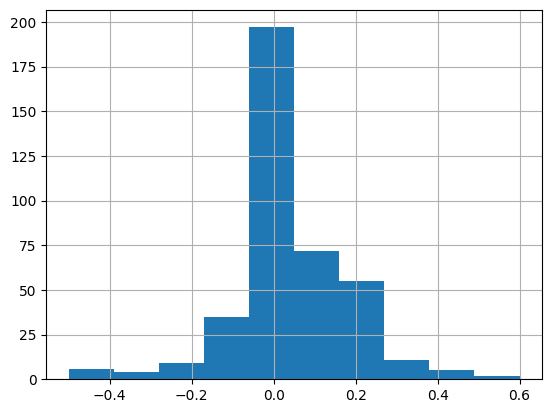

In [35]:
# We will inspect our target value, polarity
data['polarity'].hist(bins=10)

In [36]:
# Set data and target (x and y)
data, target = data.drop(columns="polarity"), data['polarity']

In [37]:
# We can see the shape of our data again
target

0     -0.054365
1      0.387500
2      0.261905
3      0.000000
4      0.000000
         ...   
391    0.000000
392    0.194444
393    0.286667
394    0.000000
395    0.112500
Name: polarity, Length: 396, dtype: float64

In [38]:
# Now we will separate our data into train and test

# Now we will separate our data into train and test

from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(
    data, target, random_state=123, test_size=0.25
)

In [39]:
# how many samples are here?
data_test

,retweets,likes,verified,followers,friends,subjectivity,hashtags
150,0,4,0,292,406,0.000000,0
42,0,0,0,2620,2656,0.417857,0
120,0,0,0,42,183,0.166667,1
102,0,0,0,288,21,0.687500,0
284,0,0,0,737,1784,0.079167,0
...,...,...,...,...,...,...,...
0,71,91,0,23415,20439,0.426984,1
162,0,2,0,1991,1839,0.033333,0
273,0,2,0,6709,7271,0.366667,0
324,0,0,0,69,168,0.000000,3


In [40]:
# how many samples are here?
target_test

150    0.000000
42     0.155952
120    0.045455
102   -0.062500
284   -0.091667
         ...   
0     -0.054365
162   -0.083333
273    0.200000
324    0.000000
38     0.033333
Name: polarity, Length: 99, dtype: float64

In [41]:
print(
    f"Number of samples in testing: {data_test.shape[0]} => "
    f"{data_test.shape[0] / data.shape[0] * 100:.1f}% of the"
    " original set"
)

Number of samples in testing: 99 => 25.0% of the original set


In [42]:
print(
    f"Number of samples in training: {data_train.shape[0]} => "
    f"{data_train.shape[0] / data.shape[0] * 100:.1f}% of the"
    " original set"
)

Number of samples in training: 297 => 75.0% of the original set


In [43]:
# We first need to import the linear regression model and set it

from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [44]:
# We can now fit
model.fit(data_train, target_train)

LinearRegression()

In [45]:
# Get the regression values of the model
print(model.coef_)
print(model.intercept_)

[ 2.51960170e-03 -3.39617127e-04 -4.05480044e-02 -1.15651973e-07
 -4.16763170e-06  1.45419574e-01  1.24720820e-02]
0.014402727593833025


In [46]:
# This is the data we used to predict number of friends
data

,retweets,likes,verified,followers,friends,subjectivity,hashtags
0,71,91,0,23415,20439,0.426984,1
1,14,98,0,6615,508,0.633333,0
2,0,1,0,22,133,0.345238,0
3,0,0,0,4191,3708,0.000000,1
4,1,1,0,4191,3708,0.000000,2
...,...,...,...,...,...,...,...
391,0,0,0,132,132,0.000000,1
392,0,0,0,286,156,0.494444,0
393,0,0,0,286,156,0.466667,0
394,0,0,0,478,738,0.000000,0


In [47]:
# Let's make a fake tweet and predict the number of friends

# some value for retweets, likes, verified, followers, friends, subjectivity & hashtags

model.predict([[0, 10, 0, 234, 3523, 0.34, 3]])

/Users/paulina/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.08315583])

# Let's one hot encode

In [96]:
data

,id,date,retweets,source,author,likes,text,twitter_name,location,verified,followers,friends,polarity,subjectivity,continent
1,508658626,2020-12-10 14:30:00,14,Twitter for Advertisers,Elsevier Energy,98,@Elsevier and the @EditorsinChief are pleased ...,ElsevierEnergy,"Oxford, England",False,6615,508,0.387500,0.633333,Europe
2,2607105006,2020-12-22 21:28:52,0,Twitter Web App,Arwyn Thomas,1,From better climate change education to improv...,siwarr5,Carmarthen,False,22,133,0.261905,0.345238,South America
3,19609660,2020-12-22 21:24:10,0,Twitter Web App,"Tom Gillispie, EDITOR/WRITER",0,climate change Links to FIXING CLIMATE CHANGE ...,EDITORatWORK,"Rural Hall, North Carolina, USA",False,4191,3708,0.000000,0.000000,Europe
4,19609660,2020-12-21 22:52:09,1,Twitter Web App,"Tom Gillispie, EDITOR/WRITER",1,climate change The 11TH HOUR FOR THE EARTH #cl...,EDITORatWORK,"Rural Hall, North Carolina, USA",False,4191,3708,0.000000,0.000000,Europe
5,18210270,2020-12-21 15:45:12,0,Hootsuite Inc.,MapsofWorld,0,For years now scientists and governments have ...,mapsofworld,"San Jose, US",False,5292,130,-0.121875,0.325000,Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,3301926908,2020-01-03 15:34:19,0,Gridpointwx,GridPointWeather,0,#CLIMATE Change Study Found Consistent Evidenc...,gridpointwx,"New York, USA",False,198,58,0.125000,0.125000,Africa
391,54992908,2020-01-03 12:29:11,0,Twitter Web App,Sascha Becher,0,An Inconsistent Truth From global cooling 1970...,SaschaBecher,Deutschland,False,132,132,0.000000,0.000000,Europe
392,209636315,2020-01-02 08:38:37,0,Twitter for iPhone,Morgan Fitzgibbon,0,2 climate thought alongside Einstein Robert Op...,morganefitz,"Cork, Ireland",False,286,156,0.194444,0.494444,Europe
393,209636315,2020-01-02 08:35:52,0,Twitter for iPhone,Morgan Fitzgibbon,0,3 climate used as supporting evidence that man...,morganefitz,"Cork, Ireland",False,286,156,0.286667,0.466667,Europe


In [92]:
# We think that we need to include some categorical variables in the model, such as where people are roughly located
data = pd.read_csv(url)
print(data.location.value_counts())

location
Earth                              15
United States                       8
Rural Hall, North Carolina, USA     8
India                               7
Rural Hall, NC                      7
                                   ..
Chicago Illinois                    1
Washington, DC; London, UK          1
Prenzlauer Berg, Berlin, DE         1
Adelaide, South Australia           1
Deutschland                         1
Name: count, Length: 186, dtype: int64


In [93]:
data.dropna(subset=['location'], inplace=True)

locations = data['location'].tolist()

In [94]:
import pycountry_convert as pc

# Mapping continents to their codes
continent_codes = {
    "NA": "North America",
    "SA": "South America",
    "AS": "Asia",
    "EU": "Europe",
    "AF": "Africa",
    "OC": "Oceania",
    "AN": "Antarctica"
}

# Function to get continent from country
def get_continent_from_country(country_name):
    try:
        country_code = pycountry.countries.get(name=country_name).alpha_2
        continent_code = pc.country_alpha2_to_continent_code(country_code)
        return continent_codes[continent_code]
    except Exception as e:
        return None

# Combining the previous code
def get_continent_from_location(location):
    country_name = get_country_from_location(location)
    if country_name:
        return get_continent_from_country(country_name)
    return None

# Extracting continent names
continent_names = [get_continent_from_location(location) for location in locations]
print(continent_names)


['Europe', 'South America', 'Europe', 'Europe', 'Asia', 'South America', 'Europe', 'South America', 'South America', 'South America', 'Asia', 'South America', 'North America', 'Europe', 'South America', 'Asia', 'Asia', None, 'Europe', 'Europe', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Oceania', 'South America', 'South America', 'North America', 'Europe', 'Europe', 'South America', 'South America', 'South America', 'South America', 'North America', 'Europe', 'Oceania', 'Asia', 'Oceania', 'Europe', 'Europe', 'South America', 'South America', 'South America', 'South America', 'Asia', 'Oceania', None, 'South America', 'North America', 'Europe', 'South America', 'Africa', 'South America', 'South America', 'South America', 'Europe', 'South America', 'Oceania', 'Europe', 'Europe', 'North America', 'North America', 'Asia', 'Europe', 'Europe', 'Asia', 'Oceania', 'Africa', 'Asia', None, 'Europe', 'Europe', 'North America', 'Europe', 'Europe', 'Asia', 'South America', 'Africa', 'Africa', 'Africa'